<a href="https://colab.research.google.com/github/ha-yang1/Suzy-s-Memo/blob/main/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EA%B0%80_Prophet%EC%9C%BC%EB%A1%9C_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
from prophet import Prophet
import pandas as pd

In [4]:
!pip install -U finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.4 MB/s eta 0:00:00


In [13]:
import FinanceDataReader as f
삼성전자주가 = f.DataReader('005930')

In [14]:

삼성전자주가.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [15]:
삼성전자주가.index

DatetimeIndex(['2000-03-09', '2000-03-10', '2000-03-13', '2000-03-14',
               '2000-03-15', '2000-03-16', '2000-03-17', '2000-03-20',
               '2000-03-21', '2000-03-22',
               ...
               '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21',
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-07-01'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [16]:
삼성전자주가['ds'] = 삼성전자주가.index
삼성전자주가['y'] = 삼성전자주가['Close']
삼성전자주가

,Open,High,Low,Close,Volume,Change,ds,y
Date,,,,,,,,
2000-03-09,5970,5980,5620,5620,1117890,NaN,2000-03-09,5620
2000-03-10,5790,5800,5520,5540,572199,-0.014235,2000-03-10,5540
2000-03-13,5480,5490,5160,5180,644358,-0.064982,2000-03-13,5180
2000-03-14,5170,5380,5160,5210,601241,0.005792,2000-03-14,5210
2000-03-15,5200,5400,5120,5400,922141,0.036468,2000-03-15,5400
...,...,...,...,...,...,...,...,...
2024-06-25,80600,81800,80100,80800,19088458,0.002481,2024-06-25,80800
2024-06-26,80100,81400,79900,81300,17783242,0.006188,2024-06-26,81300
2024-06-27,81300,81600,80500,81600,11739720,0.003690,2024-06-27,81600


In [17]:
삼성전자주가 = 삼성전자주가.drop(['Open', 'High', 'Close', 'Volume', 'Change','Low'], axis=1)

삼성전자주가.head()

,ds,y
Date,,
2000-03-09,2000-03-09,5620
2000-03-10,2000-03-10,5540
2000-03-13,2000-03-13,5180
2000-03-14,2000-03-14,5210
2000-03-15,2000-03-15,5400


In [18]:
df = 삼성전자주가.iloc[-300:]
df.head()

,ds,y
Date,,
2023-04-10,2023-04-10,65700
2023-04-11,2023-04-11,65900
2023-04-12,2023-04-12,66000
2023-04-13,2023-04-13,66100
2023-04-14,2023-04-14,65100


In [19]:
m = Prophet(
    changepoint_prior_scale=0.3,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
    )

m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cyhmkuj/sdaqgltu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cyhmkuj/4kp16r2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24077', 'data', 'file=/tmp/tmp6cyhmkuj/sdaqgltu.json', 'init=/tmp/tmp6cyhmkuj/4kp16r2u.json', 'output', 'file=/tmp/tmp6cyhmkuj/prophet_modelzoimyu6q/prophet_model-20240701050748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:07:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:07:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


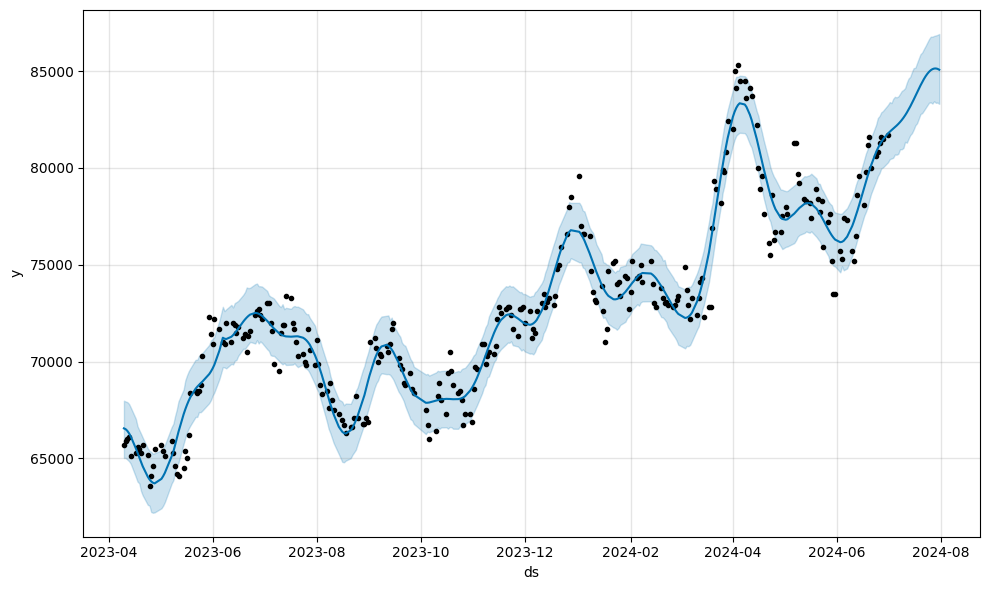

In [20]:
예측날짜 = m.make_future_dataframe(periods=30, freq='D')
예측값 = m.predict(예측날짜)

plot = m.plot(예측값)